<a href="https://colab.research.google.com/github/yashk1900/MLpractice/blob/main/text_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install langdetect

     |████████████████████████████████| 983kB 7.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=b83c9c713ba570f5eaf9da4b75cbdf12dea3fd24388dead9efb0d89dbe144296
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import numpy as np  
import pandas as pd 
import nltk
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords 
from attention import AttentionLayer  
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from langdetect import detect
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/news_summary_more.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98401 non-null  object
 1   text       98401 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None


In [ ]:
print(data['headlines'])

0          upGrad learner switches to career in ML & Al with 90% salary hike
1               Delhi techie wins free food from Swiggy for one year on CRED
2           New Zealand end Rohit Sharma-led India's 12-match winning streak
3                   Aegon life iTerm insurance plan helps customers save tax
4        Have known Hirani for yrs, what if MeToo claims are not true: Sonam
                                        ...                                 
98396                    CRPF jawan axed to death by Maoists in Chhattisgarh
98397           First song from Sonakshi Sinha's 'Noor' titled 'Uff Yeh' out
98398                             'The Matrix' film to get a reboot: Reports
98399            Snoop Dogg aims gun at clown dressed as Trump in new video 
98400                Madhesi Morcha withdraws support to Nepalese government
Name: headlines, Length: 98401, dtype: object


In [ ]:
print(data['text'])

0        Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...
1        Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...
2        New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's capt...
3        With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, cust...
4        Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [ ]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['text']:
    cleaned_text.append(text_cleaner(t))


In [ ]:
def headline_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

cleaned_headlines=[]
for i in data['headlines']:
  cleaned_headlines.append(headline_cleaner(i))


In [ ]:
print(cleaned_headlines[1:10])

['delhi techie wins free food from swiggy for one year on cred ', 'new zealand end rohit sharma led india match winning streak ', 'aegon life iterm insurance plan helps customers save tax ', 'have known hirani for yrs what if metoo claims are not true sonam ', 'rahat fateh ali khan denies getting notice for smuggling currency ', 'india get all out for their lowest odi total in new zealand ', 'govt directs alok verma to join work day before his retirement ', 'called pm modi sir times to satisfy his ego andhra cm ', 'cong wins ramgarh bypoll in rajasthan takes total to seats ']


In [ ]:
data1 = pd.DataFrame({'cleaned_text':cleaned_text,'cleaned_headlines':cleaned_headlines})
data1['cleaned_headlines'].replace('', np.nan, inplace=True)
data1.dropna(axis=0,inplace=True)

In [ ]:
data1['cleaned_headlines'] = data1['cleaned_headlines'].apply(lambda x : '_START_ '+ x + ' _END_')
data1['cleaned_text'] = data1['cleaned_text'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
for i in range(5):
    print(data1['cleaned_text'][i])
    print(data1['cleaned_headlines'][i])


_START_ administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within hours issuing circular received flak employees slammed social media _END_
_START_ daman diu revokes mandatory rakshabandhan in offices order  _END_
_START_ malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacation user commented malaika responded certainly got get damn facts right spewing know nothing _END_
_START_ malaika slams user who trolled her for divorcing rich man  _END_
_START_ indira gandhi institute medical sciences patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woman consider term objectionable institute however faced strong backlash asking new recruits declare virginity form _END_
_START_ virgin now corrected to u

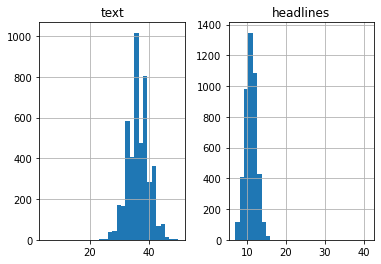

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data1['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data1['cleaned_headlines']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'headlines':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
max_len_text=60
max_len_summary=20

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data1['cleaned_text'],data1['cleaned_headlines'],test_size=0.1,random_state=0,shuffle=True) 

In [ ]:
#prepare a tokenizer for reviews on training data
print(x_val)
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')
print(x_val)

x_voc_size   =  len(x_tokenizer.word_index) +1

2931    _START_ darjeeling ruling gorkha janmukti morcha parties decided continue indefinite strike demand gorkhaland gjm announced quit semi autonomous body gorkhaland territorial administration body set...
3265    _START_ bjp shatrughan sinha took twitter praise aap convener arvind kejriwal credibility struggle commitment towards society slamming bjp sinha said bjp surely believes honesty transparency seldo...
1746    _START_ karnataka home minister parameshwara thursday termed recent bengaluru mass molestation case conspiracy defame state congress government information technology city earlier reported saying ...
3851    _START_ ssj international hotel lucknow introduced new vegetarian menu inspired uttar pradesh chief minister yogi adityanath includes saffron orange coloured dishes like paneer tikka pineapple tar...
2804    _START_ indian railways earned crore cancellation reserved tickets request passengers earnings reserved ticket cancellations crore crore crore data released cen

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 500)      8718000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 60, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
8/8 [==============================] - 26s 2s/step - loss: 7.0382 - val_loss: 4.2050
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 4.2207 - val_loss: 3.4740
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 3.8920 - val_loss: 3.4806
Epoch 4/50
8/8 [==============================] - 16s 2s/step - loss: 3.8421 - val_loss: 3.4136
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 3.7971 - val_loss: 3.3459
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 3.7155 - val_loss: 3.2165
Epoch 7/50
8/8 [==============================] - 16s 2s/step - loss: 3.6551 - val_loss: 3.2124
Epoch 8/50
8/8 [==============================] - 16s 2s/step - loss: 3.6102 - val_loss: 3.1776
Epoch 9/50
8/8 [==============================] - 16s 2s/step - loss: 3.5541 - val_loss: 3.1788
Epoch 10/50
8/8 [==============================] - 16s 2s/step - loss: 3.5049 - val_loss: 3.1548
Epoch 11/50
8/8 [======================

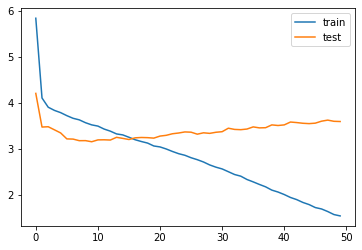

In [ ]:

from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:

reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
print(reverse_source_word_index)

{1: 'start', 2: 'end', 3: 'said', 4: 'india', 5: 'delhi', 6: 'year', 7: 'added', 8: 'police', 9: 'also', 10: 'government', 11: 'reportedly', 12: 'minister', 13: 'indian', 14: 'film', 15: 'people', 16: 'two', 17: 'old', 18: 'court', 19: 'state', 20: 'crore', 21: 'one', 22: 'reports', 23: 'party', 24: 'first', 25: 'would', 26: 'bjp', 27: 'president', 28: 'modi', 29: 'chief', 30: 'pakistan', 31: 'actor', 32: 'years', 33: 'lakh', 34: 'new', 35: 'mumbai', 36: 'three', 37: 'congress', 38: 'according', 39: 'world', 40: 'man', 41: 'allegedly', 42: 'former', 43: 'accused', 44: 'last', 45: 'like', 46: 'notably', 47: 'singh', 48: 'monday', 49: 'earlier', 50: 'made', 51: 'khan', 52: 'tuesday', 53: 'asked', 54: 'women', 55: 'time', 56: 'country', 57: 'pradesh', 58: 'national', 59: 'woman', 60: 'case', 61: 'team', 62: 'arrested', 63: 'claimed', 64: 'friday', 65: 'wednesday', 66: 'actress', 67: 'day', 68: 'leader', 69: 'found', 70: 'officials', 71: 'narendra', 72: 'high', 73: 'around', 74: 'alleged',

In [ ]:
print(reverse_target_word_index)

{1: 'end', 2: 'start', 3: 'to', 4: 'in', 5: 'for', 6: 'of', 7: 'on', 8: 'india', 9: 'delhi', 10: 'at', 11: 'with', 12: 'after', 13: 'from', 14: 'not', 15: 'over', 16: 'by', 17: 'as', 18: 'be', 19: 'govt', 20: 'is', 21: 'the', 22: 'up', 23: 'man', 24: 'will', 25: 'bjp', 26: 'mumbai', 27: 'indian', 28: 'against', 29: 'pm', 30: 'modi', 31: 'report', 32: 'old', 33: 'us', 34: 'was', 35: 'woman', 36: 'arrested', 37: 'police', 38: 'crore', 39: 'no', 40: 'pak', 41: 'cm', 42: 'his', 43: 'cr', 44: 'case', 45: 'it', 46: 'film', 47: 'first', 48: 'world', 49: 'year', 50: 'new', 51: 'and', 52: 'who', 53: 'my', 54: 'lakh', 55: 'ban', 56: 'sc', 57: 'women', 58: 'has', 59: 'get', 60: 'trump', 61: 'if', 62: 'reports', 63: 'people', 64: 'out', 65: 'day', 66: 'says', 67: 'china', 68: 'attack', 69: 'air', 70: 'have', 71: 'pakistan', 72: 'her', 73: 'kejriwal', 74: 'aap', 75: 'st', 76: 'can', 77: 'airport', 78: 'years', 79: 'may', 80: 'hc', 81: 'minister', 82: 'me', 83: 'gets', 84: 'son', 85: 'team', 86: 'ch

In [ ]:
print(target_word_index)

{'end': 1, 'start': 2, 'to': 3, 'in': 4, 'for': 5, 'of': 6, 'on': 7, 'india': 8, 'delhi': 9, 'at': 10, 'with': 11, 'after': 12, 'from': 13, 'not': 14, 'over': 15, 'by': 16, 'as': 17, 'be': 18, 'govt': 19, 'is': 20, 'the': 21, 'up': 22, 'man': 23, 'will': 24, 'bjp': 25, 'mumbai': 26, 'indian': 27, 'against': 28, 'pm': 29, 'modi': 30, 'report': 31, 'old': 32, 'us': 33, 'was': 34, 'woman': 35, 'arrested': 36, 'police': 37, 'crore': 38, 'no': 39, 'pak': 40, 'cm': 41, 'his': 42, 'cr': 43, 'case': 44, 'it': 45, 'film': 46, 'first': 47, 'world': 48, 'year': 49, 'new': 50, 'and': 51, 'who': 52, 'my': 53, 'lakh': 54, 'ban': 55, 'sc': 56, 'women': 57, 'has': 58, 'get': 59, 'trump': 60, 'if': 61, 'reports': 62, 'people': 63, 'out': 64, 'day': 65, 'says': 66, 'china': 67, 'attack': 68, 'air': 69, 'have': 70, 'pakistan': 71, 'her': 72, 'kejriwal': 73, 'aap': 74, 'st': 75, 'can': 76, 'airport': 77, 'years': 78, 'may': 79, 'hc': 80, 'minister': 81, 'me': 82, 'gets': 83, 'son': 84, 'team': 85, 'chief'

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        print(sampled_token_index)
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            print("stopped")
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: start darjeeling ruling gorkha janmukti morcha parties decided continue indefinite strike demand gorkhaland gjm announced quit semi autonomous body gorkhaland territorial administration body set better administration region parties also boycott meeting called west bengal government end 
Original summary: indefinite strike to continue in darjeeling to quit 
9
23
117
5
2485
5
1001
1436
1
stopped
Predicted summary:  delhi man held for misbehaving for obscene fb


Review: start bjp shatrughan sinha took twitter praise aap convener arvind kejriwal credibility struggle commitment towards society slamming bjp sinha said bjp surely believes honesty transparency together also slammed bjp leaders indulging negative politics political opponents including kejriwal lalu yadav end 
Original summary: sinha praises kejriwal for his 
88
7205
2630
3
773
993
4
56
1
stopped
Predicted summary:  congress joshi agree to decide cashless in sc


Review: start karnataka home minister thursday termed rec

KeyboardInterrupt: ignored